In [18]:
import seaborn as sns, matplotlib.pyplot as plt
import math
import numpy as np 
import pysam

In [19]:
in_fa = "/SGRNJ06/randd/PROJECT/RD20073101_ScRNA_VDJ/bulk_TCR/20230906_Hum_Liver_T3lb/Hum_0830liver_T3lib/03.consensus/Hum_0830liver_T3lib_filtered_consensus.fasta"

In [20]:
out_fa1 = open("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20231013vdjtools/Liver/index1.fa", 'w')
out_fa2 = open("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20231013vdjtools/Liver/index2.fa", 'w')
out_fa3 = open("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20231013vdjtools/Liver/index3.fa", 'w')
out_fa4 = open("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20231013vdjtools/Liver/index4.fa", 'w')
out_fa5 = open("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20231013vdjtools/Liver/index5.fa", 'w')
out_fa6 = open("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20231013vdjtools/Liver/index6.fa", 'w')
out_fa7 = open("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20231013vdjtools/Liver/index7.fa", 'w')
out_fa8 = open("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20231013vdjtools/Liver/index8.fa", 'w')

In [21]:
with pysam.FastxFile(in_fa) as f:
    for read in f:
        index = read.name.split('_')[0]
        if index == "AGTCCT":
            out_fa1.write(f'>{read.name}\n{read.sequence}\n')
        elif index == "GTTGAG":
            out_fa2.write(f'>{read.name}\n{read.sequence}\n')
        elif index == "TAGCTG":
            out_fa3.write(f'>{read.name}\n{read.sequence}\n')
        elif index == "TCGCCA":
            out_fa4.write(f'>{read.name}\n{read.sequence}\n')
        elif index == "GAACTC":
            out_fa5.write(f'>{read.name}\n{read.sequence}\n')
        elif index == "TATGGT":
            out_fa6.write(f'>{read.name}\n{read.sequence}\n')
        elif index == "CGCAAC":
            out_fa7.write(f'>{read.name}\n{read.sequence}\n')
        elif index == "TGGCAG":
            out_fa8.write(f'>{read.name}\n{read.sequence}\n')

In [22]:
out_fa1.close()
out_fa2.close()
out_fa3.close()
out_fa4.close()
out_fa5.close()
out_fa6.close()
out_fa7.close()
out_fa8.close()

In [ ]:
"""
conda actiate trust4_1.7
mixcr analyze amplicon -s hsa --starting-material dna --5-end v-primers --3-end j-primers --adapters adapters-present index4.fa ./index4

conda activate cjj_bulk_vdj
mkdir vdjtools_result
java -jar /SGRNJ06/randd/USER/cjj/soft/vdjtools/vdjtools-1.2.1/vdjtools-1.2.1.jar Convert -S mixcr index1.clonotypes.ALL.txt ./vdjtools_result
cd vdjtools_result
java -jar /SGRNJ06/randd/USER/cjj/soft/vdjtools/vdjtools-1.2.1/vdjtools-1.2.1.jar CalcBasicStats * ./

gene_usage:
java -jar /SGRNJ06/randd/USER/cjj/soft/vdjtools/vdjtools-1.2.1/vdjtools-1.2.1.jar CalcSegmentUsage -p index* ./
cp /SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230822vdjtools/vdjtools_result/vexpr_plot.r .
Rscript vexpr_plot.r  ./segments.wt.V.pdf
Rscript vexpr_plot.r  ./segments.wt.J.pdf


"""

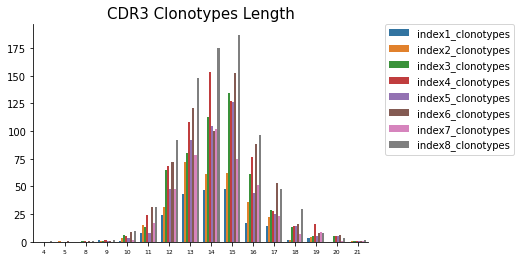

In [23]:
input_path='/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20231013vdjtools/Liver/vdjtools_result/'#输入路径
output_path='/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20231013vdjtools/Liver/vdjtools_result/'#输出路径
sample_info='basicstats.txt'#记录有样本分组的样本信息
dict_sample_LengthCount={}
list_pos=[]
for line in open(input_path+sample_info,'r'):
    info=line[:-1].split('\t')
    id=info[0]
    if id == "sample_id":
        continue
    if id!='ID':
        if str(info[1])=='Class1':
            list_pos.append(id)
        read_file=open(input_path+id+'.txt','r')
        dict_length_count={}
        for line in read_file:
            if line[0]!='c':
                length=len(line[:-1].split('\t')[3])
                if length < 30:
                    if length not in dict_length_count.keys():
                        dict_length_count[length]=1
                    else:
                        dict_length_count[length]+=1
        dict_sample_LengthCount[id]=dict_length_count
        read_file.close()
list_length=[]
list_class=[]
list_sample=[]
list_count=[]
for sample in dict_sample_LengthCount.keys():
    dict_length_count=dict_sample_LengthCount[sample]
    for length in dict_length_count.keys():
        list_length.append(length)
        list_sample.append(sample)
        if sample in list_pos:
            list_class.append('Class1')
        else:
            list_class.append('Class2')
        list_count.append(dict_length_count[length])

# ax1 = sns.barplot(x=list_length,y=list_count,hue=list_class,errwidth=0.5,capsize=0.5,palette=(sns.xkcd_rgb["dark red"],sns.xkcd_rgb["marine blue"]))
# ax1_1 = sns.stripplot(x=list_length,y=list_count,hue=list_class,size=2,dodge=True,palette=(sns.xkcd_rgb["dark red"],sns.xkcd_rgb["marine blue"]))
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-90,fontsize=6)
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# #plt.savefig(output_path+'Length_barplot_Class.pdf', dpi=300, bbox_inches="tight")
# plt.show()
list_sample = [i.split('.')[0] + "_clonotypes" for i in list_sample]
ax2 = sns.barplot(x=list_length,y=list_count,hue=list_sample,errwidth=0.5,capsize=0.5)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=-0,fontsize=6)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.title("CDR3 Clonotypes Length", fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1),loc=2,borderaxespad=0)
plt.savefig(output_path+'Length_barplot_Sample.pdf', dpi=300, bbox_inches="tight")
#plt.show()

{'index1.clonotypes.ALL': {'1': 28.22966507177033, '2-3': 4.30622009569378, '4-10': 7.655502392344498, '11-30': 46.411483253588514, '31-100': 12.440191387559809, '101-MAX': 0.9569377990430622}, 'index2.clonotypes.ALL': {'1': 24.437299035369776, '2-3': 5.466237942122187, '4-10': 6.430868167202572, '11-30': 48.55305466237942, '31-100': 14.14790996784566, '101-MAX': 0.964630225080386}, 'index3.clonotypes.ALL': {'1': 28.27324478178368, '2-3': 5.1233396584440225, '4-10': 8.349146110056926, '11-30': 41.935483870967744, '31-100': 14.800759013282732, '101-MAX': 1.5180265654648957}, 'index4.clonotypes.ALL': {'1': 29.72972972972973, '2-3': 6.995230524642289, '4-10': 9.062003179650238, '11-30': 37.51987281399046, '31-100': 14.94435612082671, '101-MAX': 1.7488076311605723}, 'index5.clonotypes.ALL': {'1': 27.044025157232703, '2-3': 7.337526205450734, '4-10': 7.756813417190776, '11-30': 44.0251572327044, '31-100': 12.78825995807128, '101-MAX': 1.0482180293501049}, 'index6.clonotypes.ALL': {'1': 29.6

/SGRNJ/Public/Software/conda_env/chenjunjie/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator


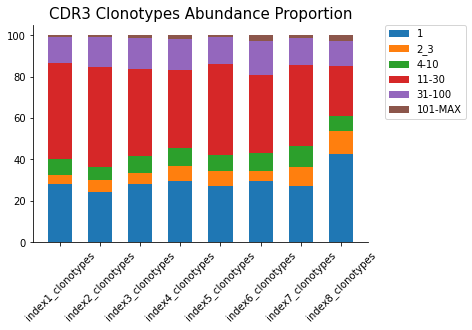

In [24]:
input_path='/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20231013vdjtools/Liver/vdjtools_result/'#输入路径
output_path='/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20231013vdjtools/Liver/vdjtools_result/'#输出路径
sample_info='basicstats.txt'#记录有样本分组的样本信息
dict_sample_ReadsCounts={}
list_pos=[]
for line in open(input_path+sample_info,'r'):
    info = line[:-1].split('\t')
    id = info[0]
    if id == "sample_id":
        continue
    if id != 'ID':
        if str(info[1]) == 'Class1':
            list_pos.append(id)
        read_file = open(input_path + id + ".txt", 'r')
        dict_read_count={'1':0,'2-3':0,'4-10':0,'11-30':0,'31-100':0,'101-MAX':0}
        number_clonotypes=0
        for line in read_file:
            if line[0] != 'c':
                number_clonotypes+=1
                info=line[:-1].split('\t')
                count=info[0]
                if int(count) == 1:
                    dict_read_count['1']+=1
                elif int(count) in [2,3]:
                    dict_read_count['2-3']+=1
                elif 4 <= int(count) <= 10:
                    dict_read_count['4-10']+=1
                elif 11 <= int(count) <= 30:
                    dict_read_count['11-30']+=1
                elif 31 <= int(count) <= 100:
                    dict_read_count['31-100']+=1
                elif int(count) >= 101:
                    dict_read_count['101-MAX']+=1
        for key in dict_read_count:
            dict_read_count[key]=dict_read_count[key]/number_clonotypes*100
        dict_sample_ReadsCounts[id]=dict_read_count
        read_file.close()

list_sample=[]
list_class=[]
list_read=[]
list_count=[]
dict_read_SampleCount={'1': {},'2-3': {},'4-10': {},'11-30': {},'31-100': {},'101-MAX': {}}
print(dict_sample_ReadsCounts)
for sample in dict_sample_ReadsCounts.keys():
    dict_read_count=dict_sample_ReadsCounts[sample]
    for read in dict_read_count.keys():
        list_sample.append(sample)
        if sample in list_pos:
            list_class.append('Class1')
        else:
            list_class.append('Class2')
        list_read.append(read)
        count=float(dict_read_count[read])
        list_count.append(count)
        dict_sample_count=dict_read_SampleCount[read]
        dict_sample_count[sample]=count
        dict_read_SampleCount[read]=dict_sample_count

# ax1 = sns.barplot(x=list_read,y=list_count,hue=list_class,errwidth=1,capsize=0.2,palette=(sns.xkcd_rgb["dark red"],sns.xkcd_rgb["marine blue"]))
# ax1_1 = sns.stripplot(x=list_read,y=list_count,hue=list_class,dodge=True,palette=(sns.xkcd_rgb["dark red"],sns.xkcd_rgb["marine blue"]))
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-90,fontsize=6)
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# plt.savefig(output_path+'CountProportion_lappedplot_Class.pdf',dpi=300, bbox_inches="tight")#
# plt.show()

fig, ax = plt.subplots()
list_1=[]
list_2_3=[]
list_4_10=[]
list_11_30=[]
list_31_100=[]
list_101_MAX=[]
for read in dict_read_SampleCount.keys():
    dict_sample_count=dict_read_SampleCount[read]
    list_sample=[]
    for sample in dict_sample_count.keys():
        list_sample.append(sample)
        if read=='1':
            list_1.append(dict_sample_count[sample])
        elif read=='2-3':
            list_2_3.append(dict_sample_count[sample])
        elif read=='4-10':
            list_4_10.append(dict_sample_count[sample])
        elif read=='11-30':
            list_11_30.append(dict_sample_count[sample])
        elif read=='31-100':
            list_31_100.append(dict_sample_count[sample])
        elif read=='101-MAX':
            list_101_MAX.append(dict_sample_count[sample])
list_1=np.array(list_1)
list_2_3=np.array(list_2_3)
list_4_10=np.array(list_4_10)
list_11_30=np.array(list_11_30)
list_31_100=np.array(list_31_100)
list_101_MAX=np.array(list_101_MAX)
width = 0.6
print(list_1)
ax.bar(list_sample,list_1,width, label='1')
ax.bar(list_sample,list_2_3,width,label='2_3',bottom=list_1)
ax.bar(list_sample,list_4_10,width,label='4-10',bottom=list_1+list_2_3)
ax.bar(list_sample,list_11_30,width,label='11-30',bottom=list_1+list_2_3+list_4_10)
ax.bar(list_sample,list_31_100,width,label='31-100',bottom=list_1+list_2_3+list_4_10+list_11_30)
ax.bar(list_sample,list_101_MAX,width,label='101-MAX',bottom=list_1+list_2_3+list_4_10+list_11_30+list_31_100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
list_sample = [i.split('.')[0] + "_clonotypes" for i in list_sample]
ax.set_xticklabels(list_sample, rotation=45, fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1),loc=2,borderaxespad=0)
plt.title("CDR3 Clonotypes Abundance Proportion", fontsize=15)
plt.savefig(output_path+'CountProportion_barplot_sample.pdf',dpi=300, bbox_inches="tight")
plt.show()